# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

The objective of this project is to build a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

pd.set_option("display.max_columns", None)
# pd.set_option("display.float_format", lambda x: "%.3f" % x)
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
creditcard_df = pd.read_csv('BankChurners.csv')
creditcard_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
creditcard_df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


## Data Overview

- Observations
- Sanity checks

In [4]:
#checking data types
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
#checking for number of missing values in each column
creditcard_df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [6]:
#stats summary - numeric columns
creditcard_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
#stats summary - non-numeric columns
creditcard_df.describe(include=["object"])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10127,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [8]:
#stats summary - non-numeric columns
for i in creditcard_df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(creditcard_df[i].value_counts(dropna=False))
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
NaN          749
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: c

In [9]:
#checking for duplicates
creditcard_df.duplicated().sum()

0

In [10]:
## Encoding Attrition_Flag to 0 for Existing customers & 1 for Attrited customers 
creditcard_df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
creditcard_df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [14]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Univariate Analysis

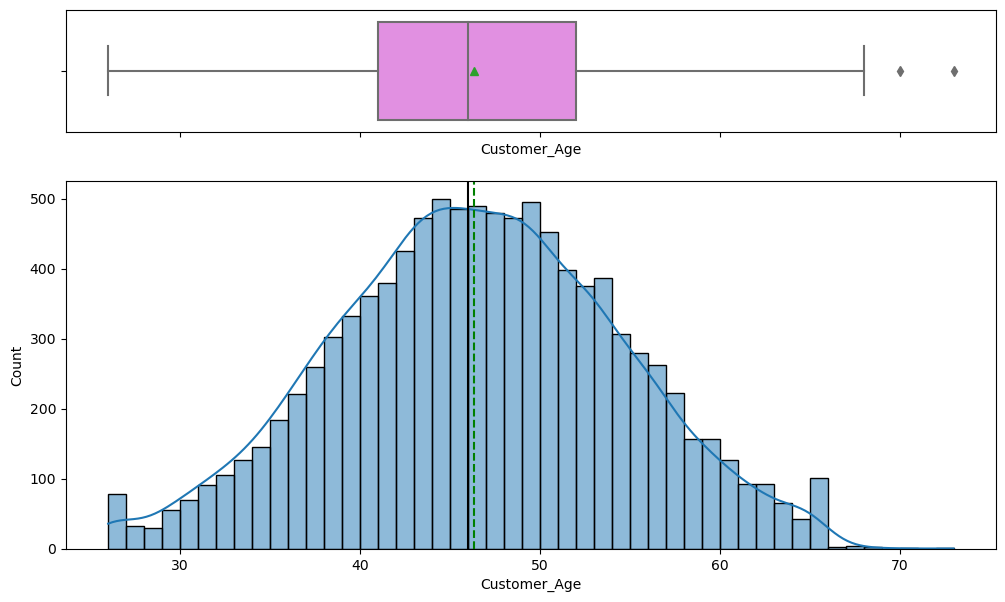

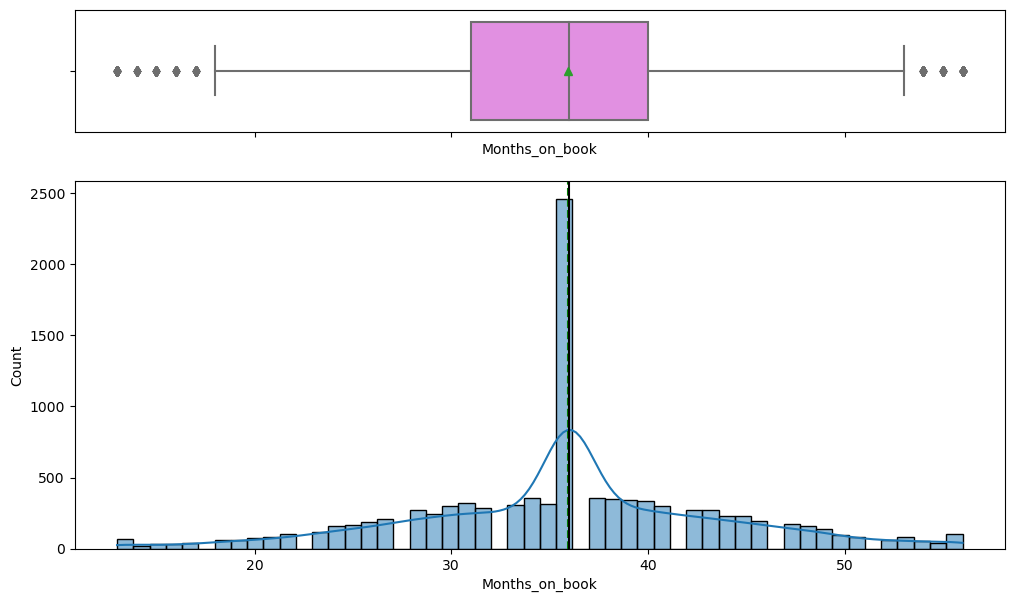

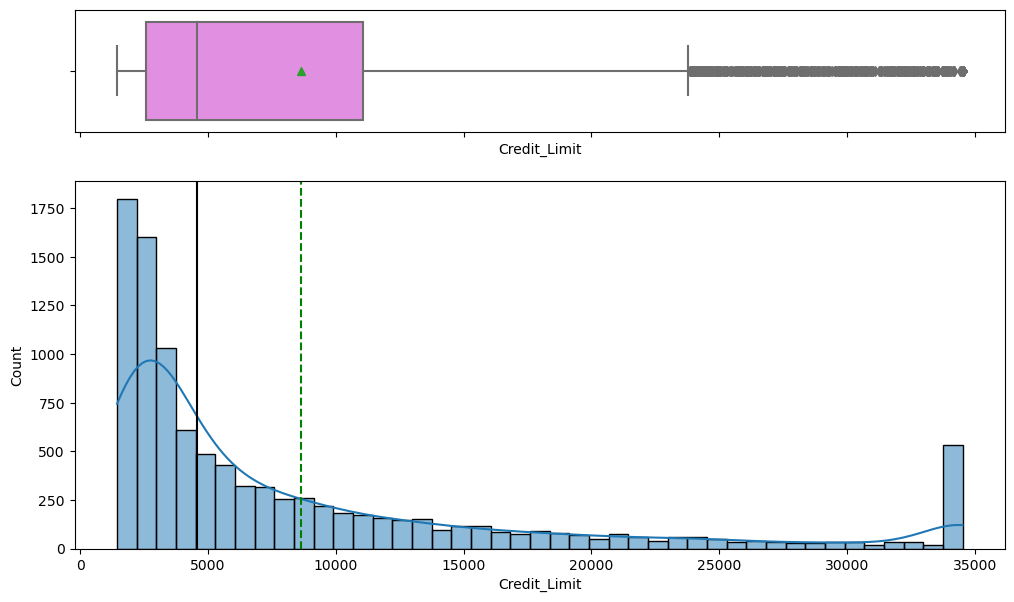

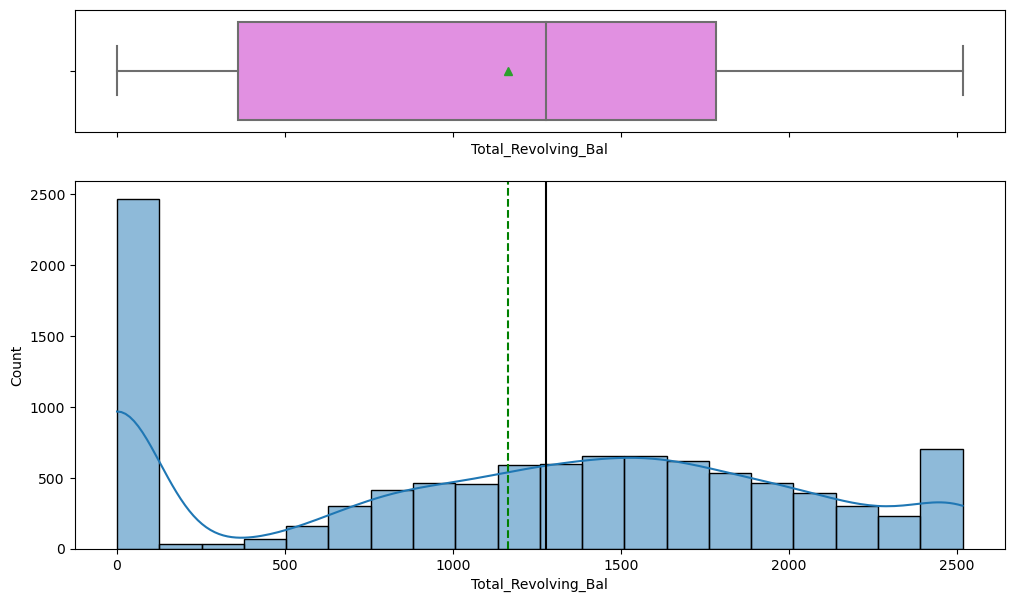

In [15]:
columns_for_HistBoxplot_1 = ['Customer_Age', 
                             'Months_on_book',
                             'Credit_Limit',
                             'Total_Revolving_Bal'
                         ]

for i in columns_for_HistBoxplot_1:
    histogram_boxplot(creditcard_df, i, kde=True)

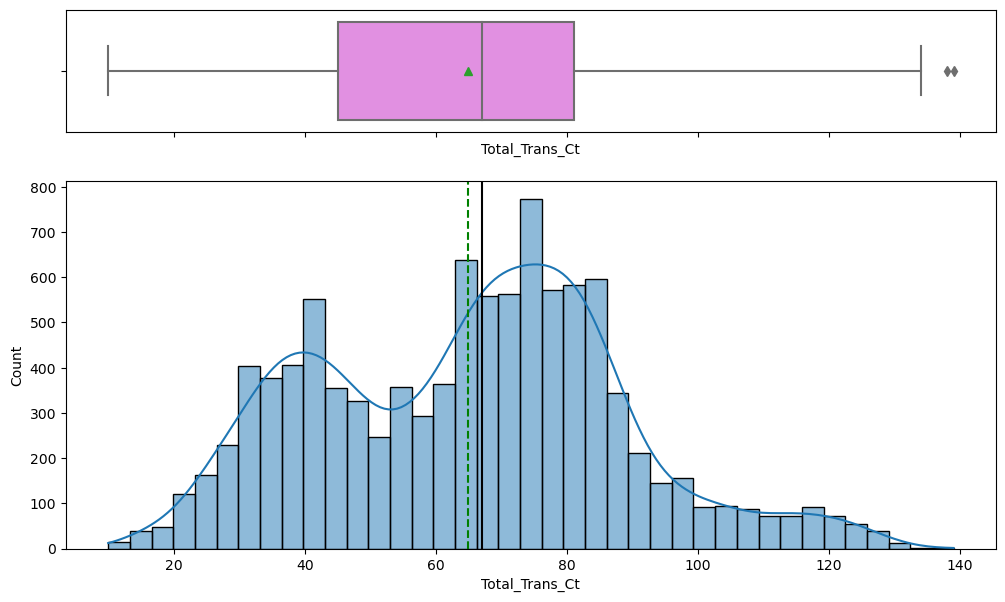

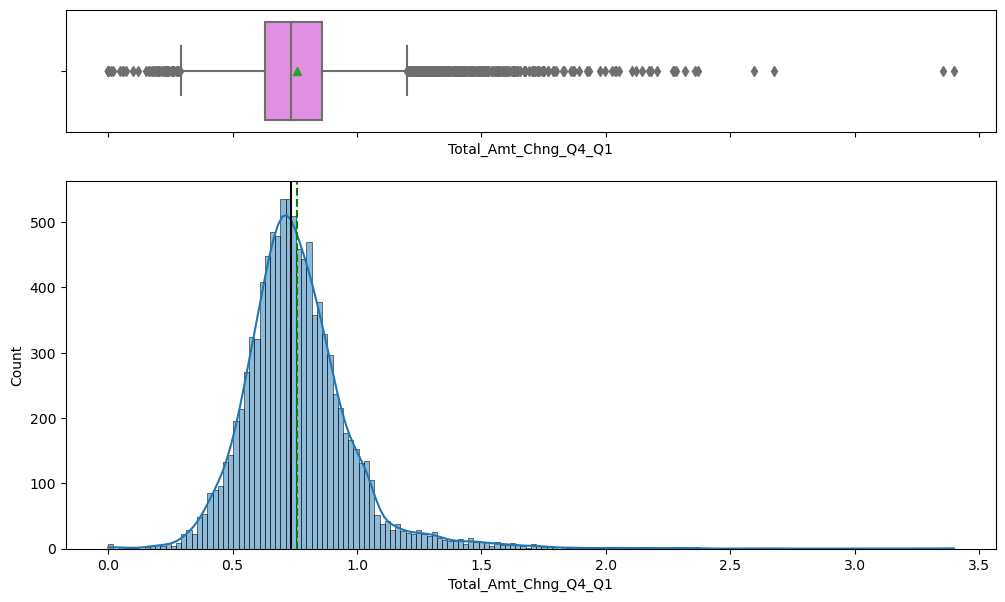

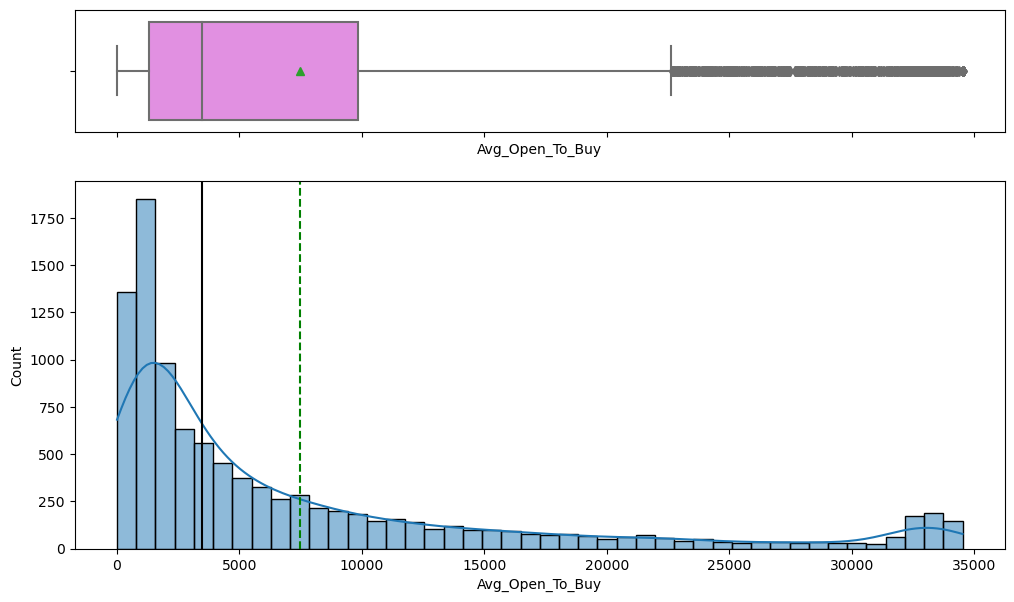

In [16]:
columns_for_HistBoxplot_2 = ['Total_Trans_Ct',
                             'Total_Amt_Chng_Q4_Q1',
                             'Avg_Open_To_Buy'
                         ]

for i in columns_for_HistBoxplot_2:
    histogram_boxplot(creditcard_df, i, kde=True)

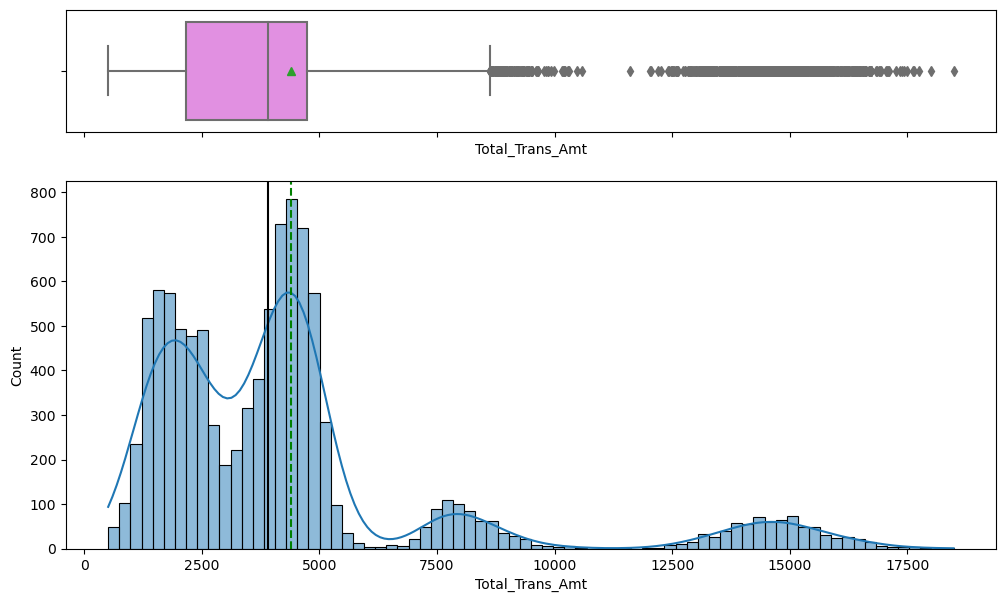

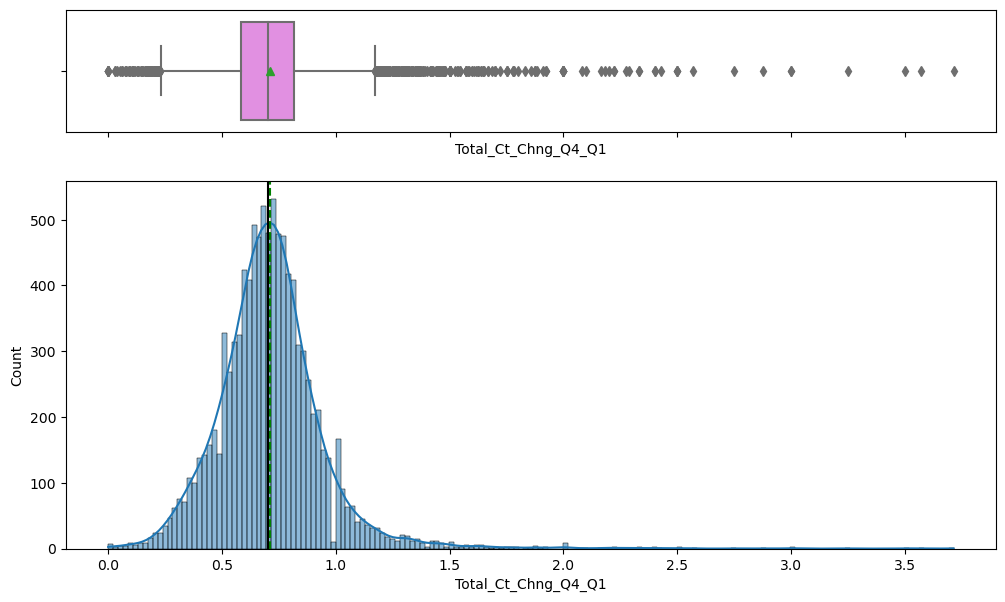

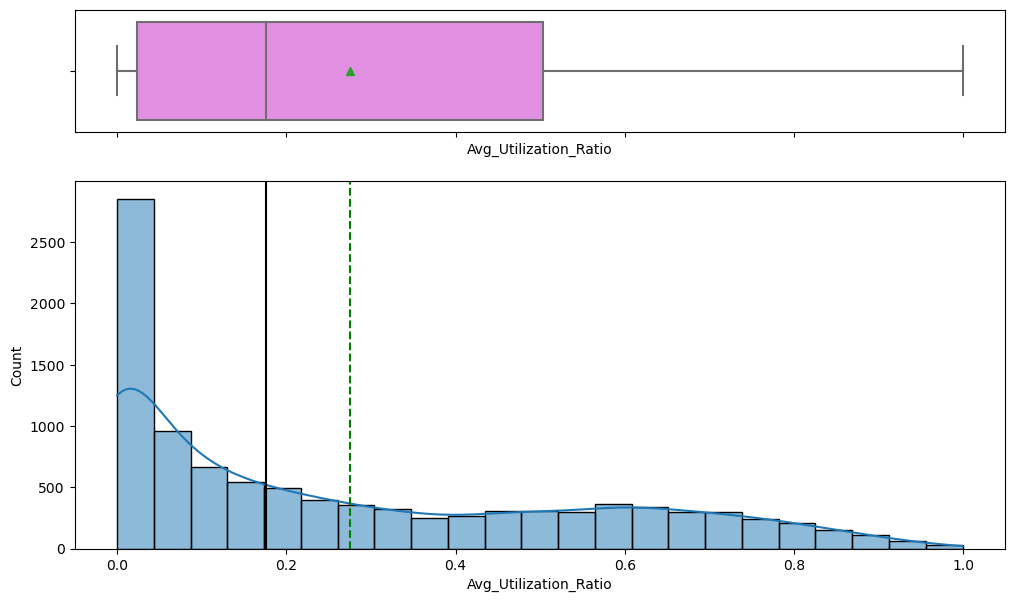

In [17]:
columns_for_HistBoxplot_3 = ['Total_Trans_Amt',
                            'Total_Ct_Chng_Q4_Q1',
                            'Avg_Utilization_Ratio'
                         ]

for i in columns_for_HistBoxplot_3:
    histogram_boxplot(creditcard_df, i, kde=True)


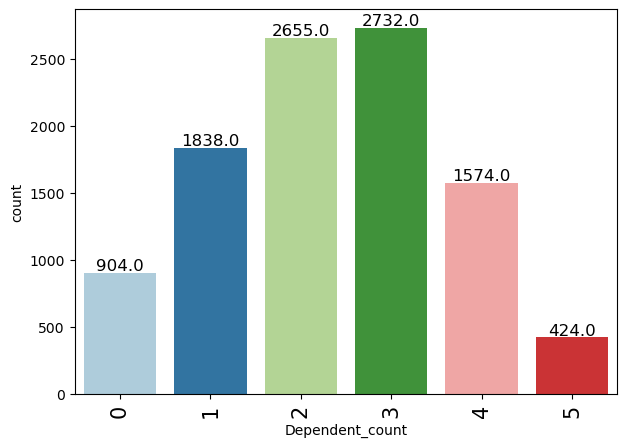

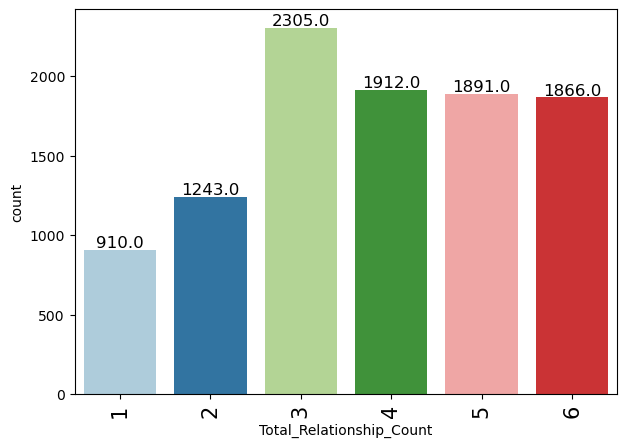

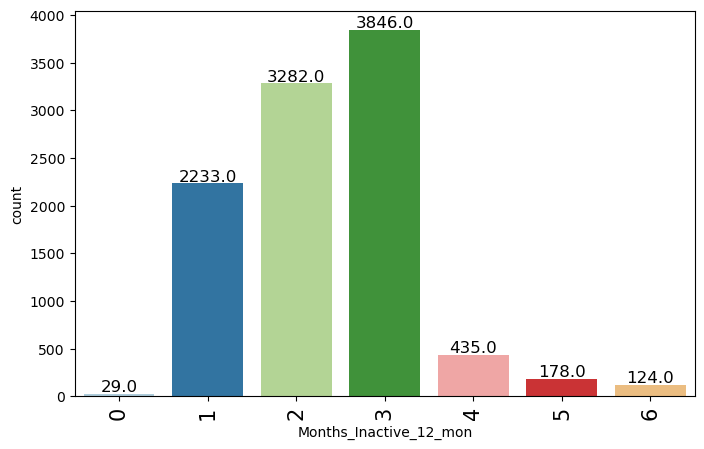

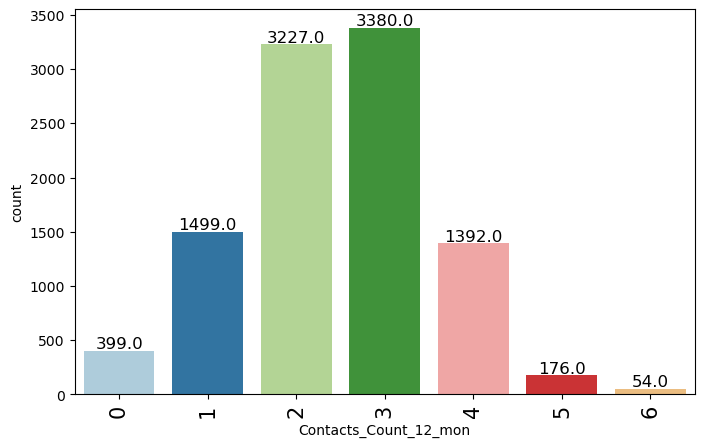

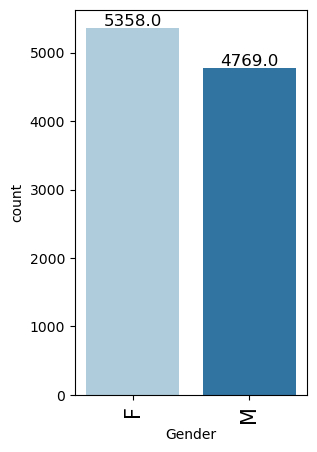

In [18]:
columns_for_labeledBarplot_1 = ['Dependent_count',
                              'Total_Relationship_Count',
                              'Months_Inactive_12_mon',
                              'Contacts_Count_12_mon',
                              'Gender'
                             ]

for i in columns_for_labeledBarplot_1:
    labeled_barplot(creditcard_df, i)

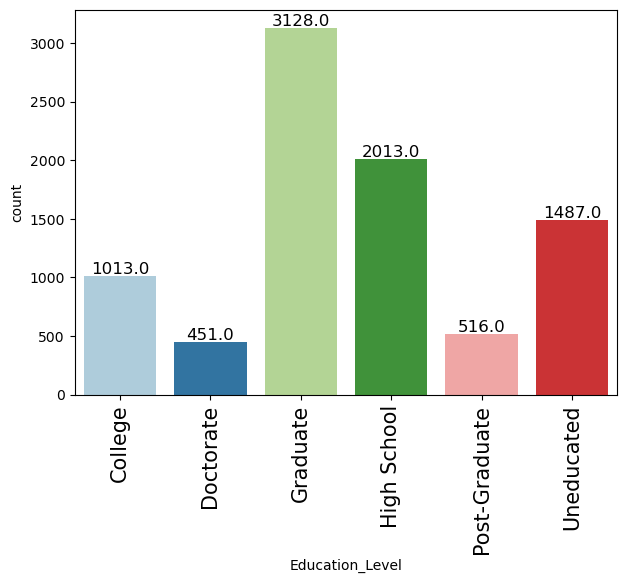

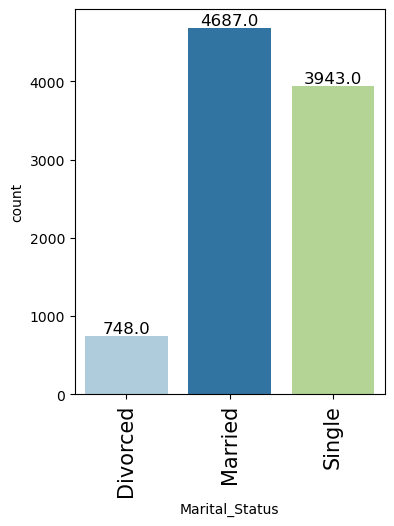

In [19]:
columns_for_labeledBarplot_2 = ['Education_Level',
                                'Marital_Status'
                             ]

for i in columns_for_labeledBarplot_2:
    labeled_barplot(creditcard_df, i)

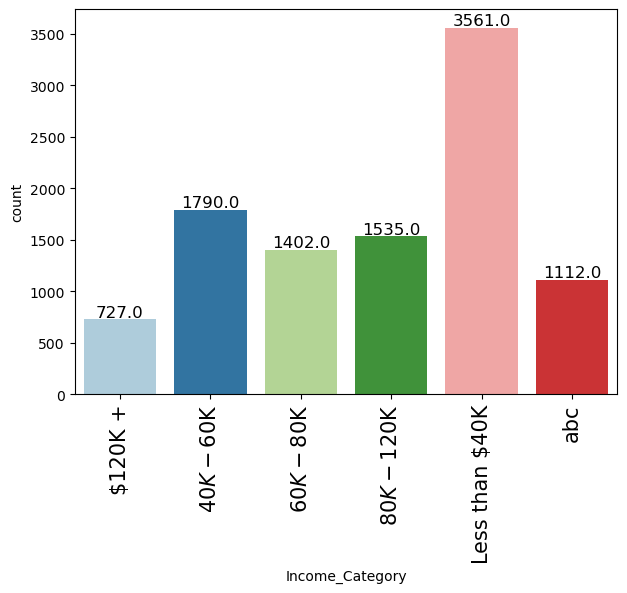

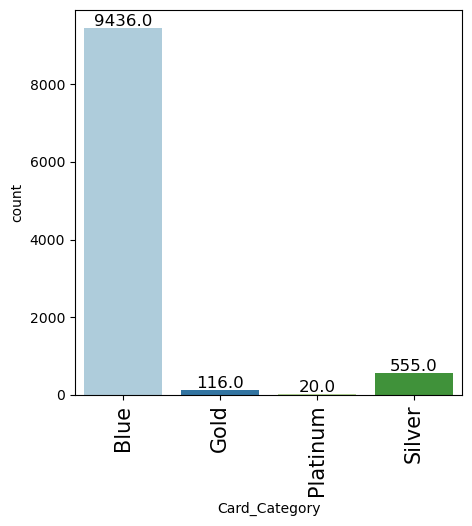

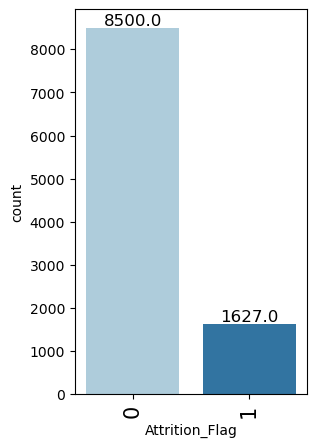

In [20]:
columns_for_labeledBarplot_3 = ['Income_Category',
                                'Card_Category',
                                'Attrition_Flag'
                             ]

for i in columns_for_labeledBarplot_3:
    labeled_barplot(creditcard_df, i)

#### Bivariate Analysis

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


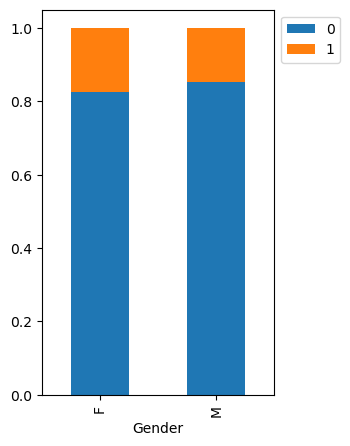

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


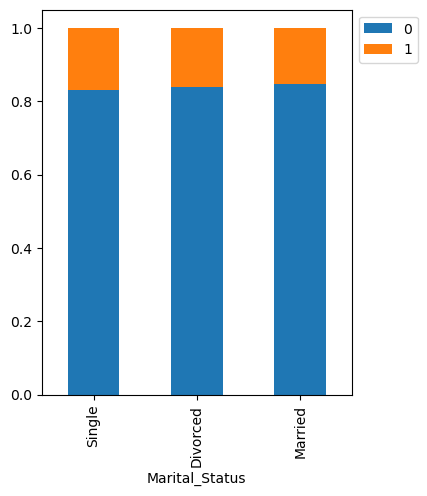

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


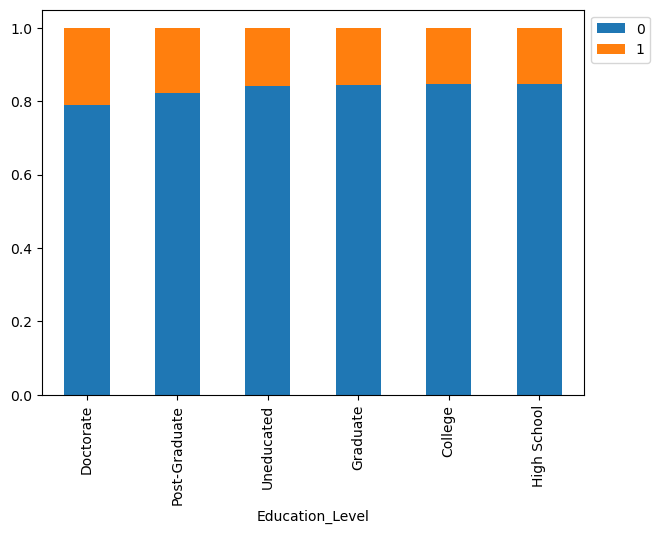

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


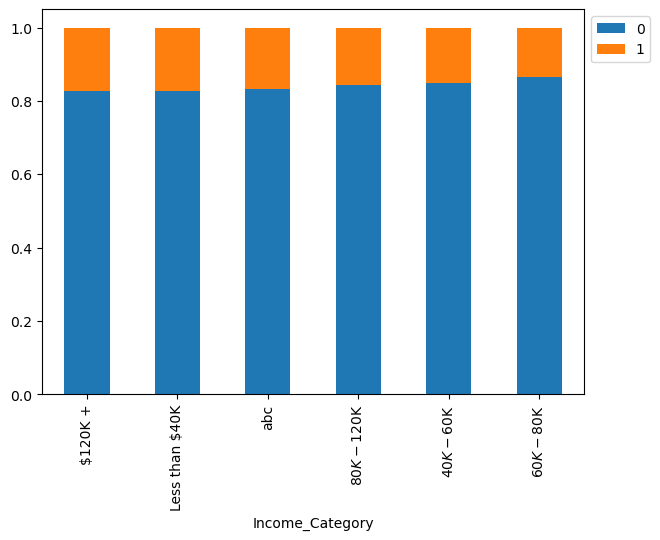

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


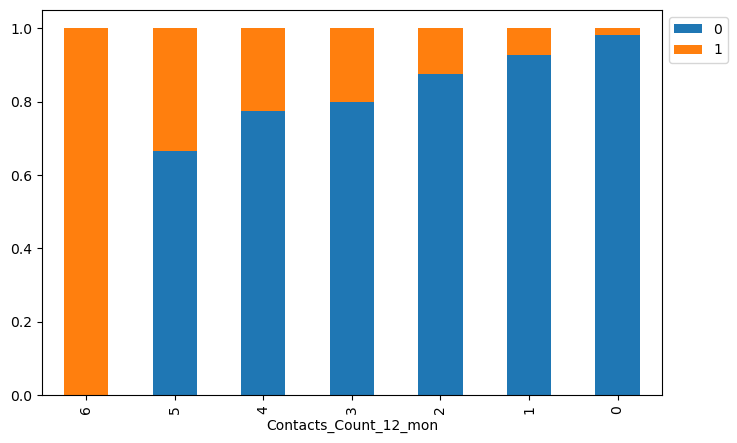

In [21]:
columns_for_stackedBarplot_1 = ['Gender', 
                              'Marital_Status',
                              'Education_Level',
                              'Income_Category',
                              'Contacts_Count_12_mon',
                          ]

for i in columns_for_stackedBarplot_1:
    stacked_barplot(creditcard_df, i, "Attrition_Flag")

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


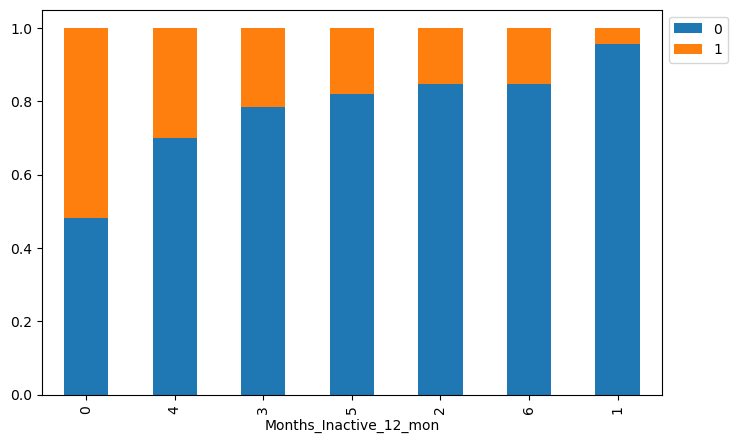

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


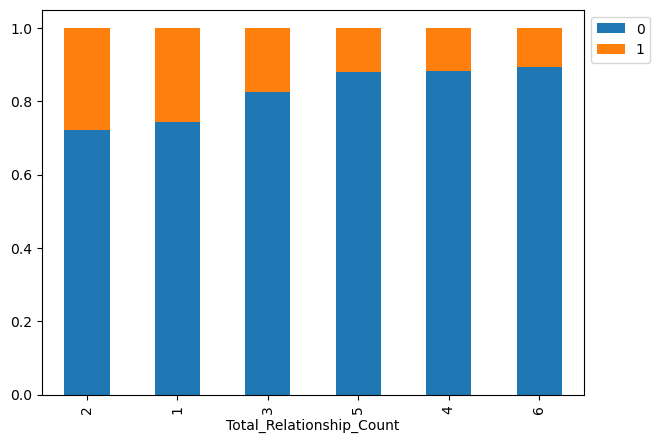

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


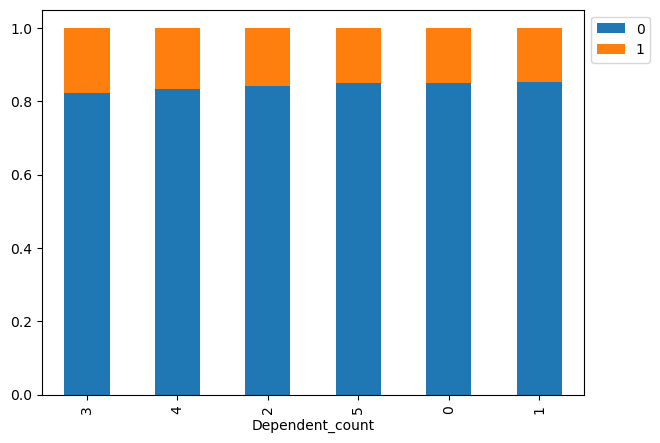

In [22]:
columns_for_stackedBarplot_2 = ['Months_Inactive_12_mon',
                                'Total_Relationship_Count',
                                'Dependent_count'
                          ]

for i in columns_for_stackedBarplot_2:
    stacked_barplot(creditcard_df, i, "Attrition_Flag")

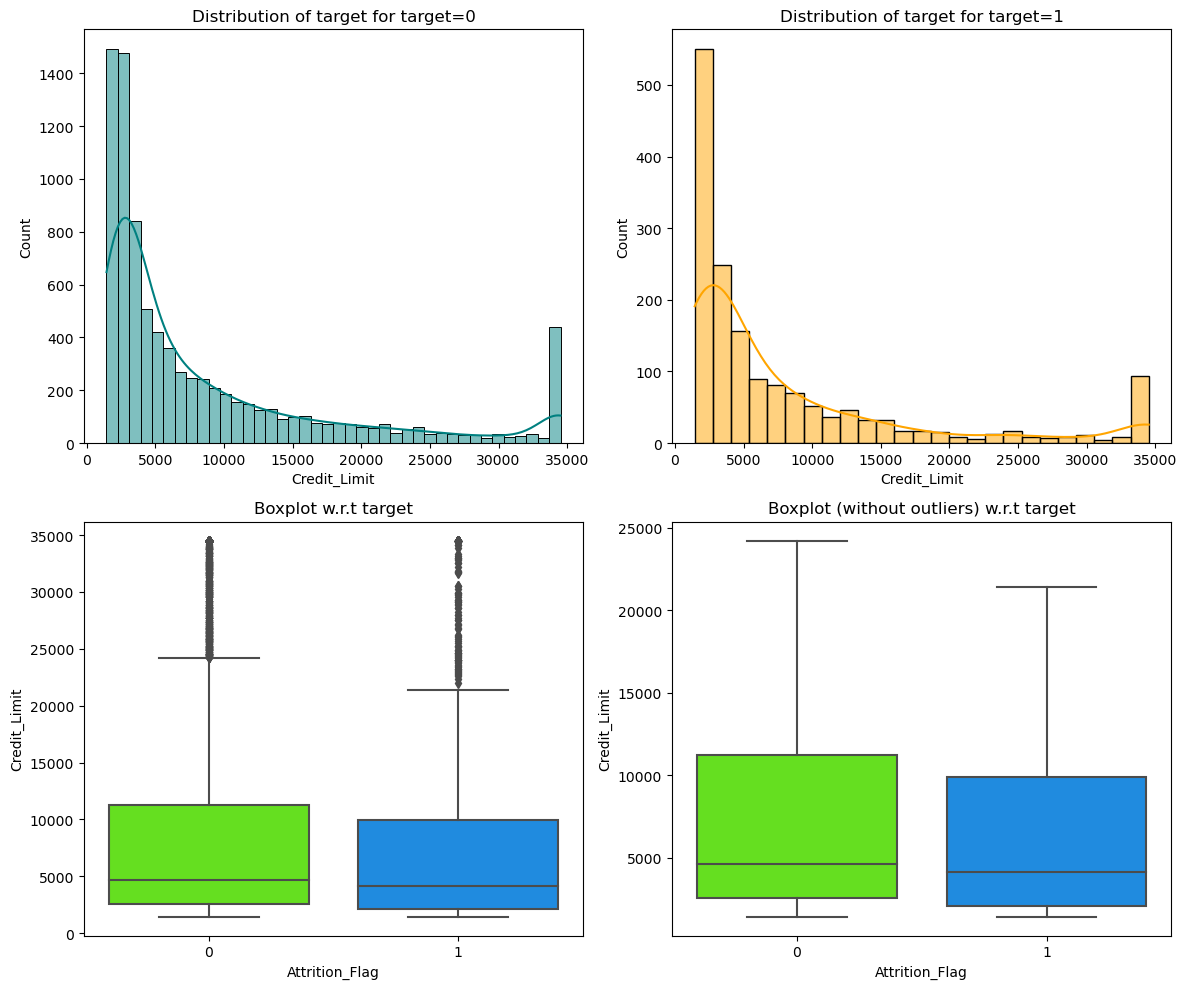

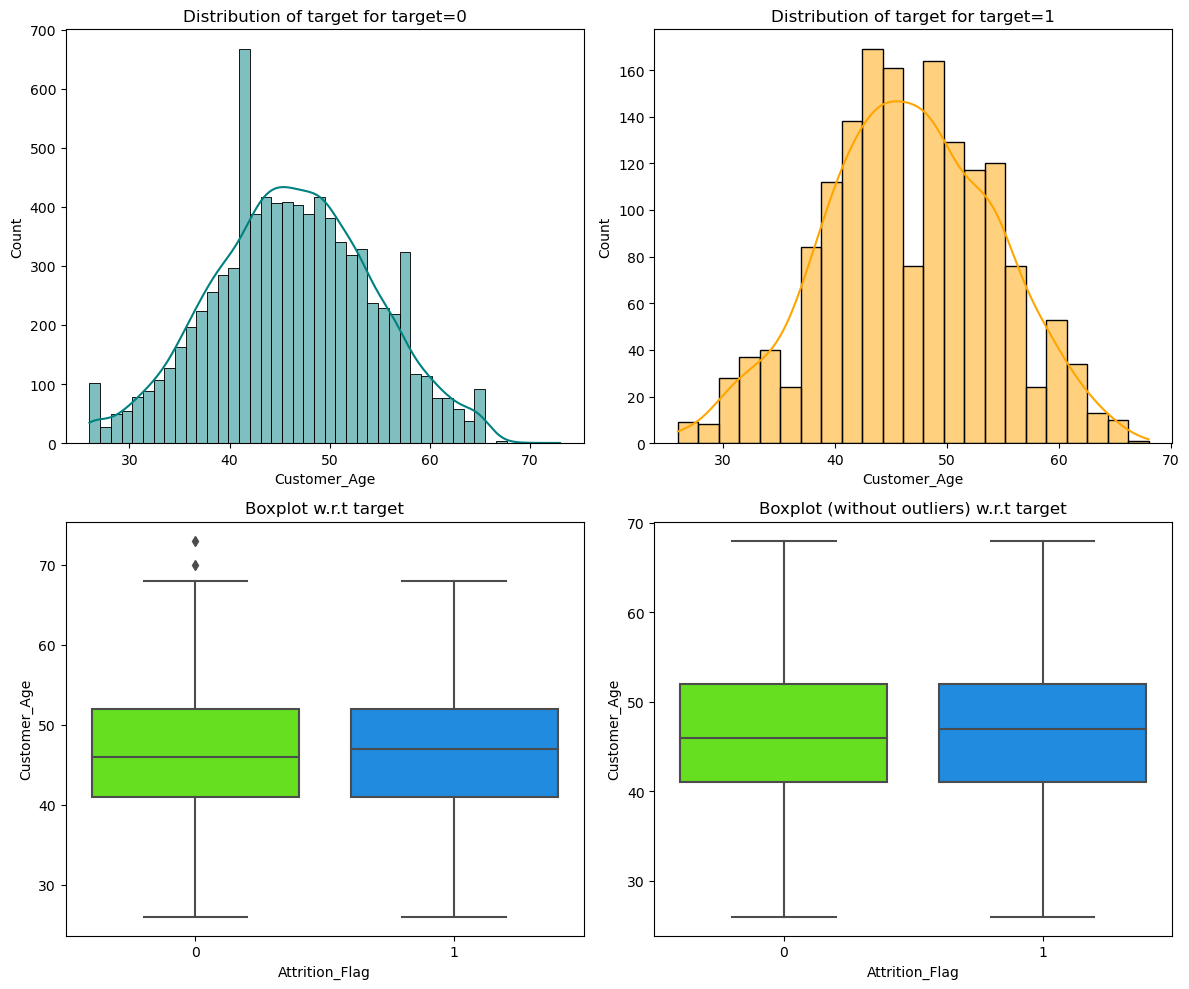

In [23]:
columns_for_DistBarplot_1 = ['Credit_Limit',
                              'Customer_Age'    
                          ]

for i in columns_for_DistBarplot_1:
    distribution_plot_wrt_target(creditcard_df, i, "Attrition_Flag")

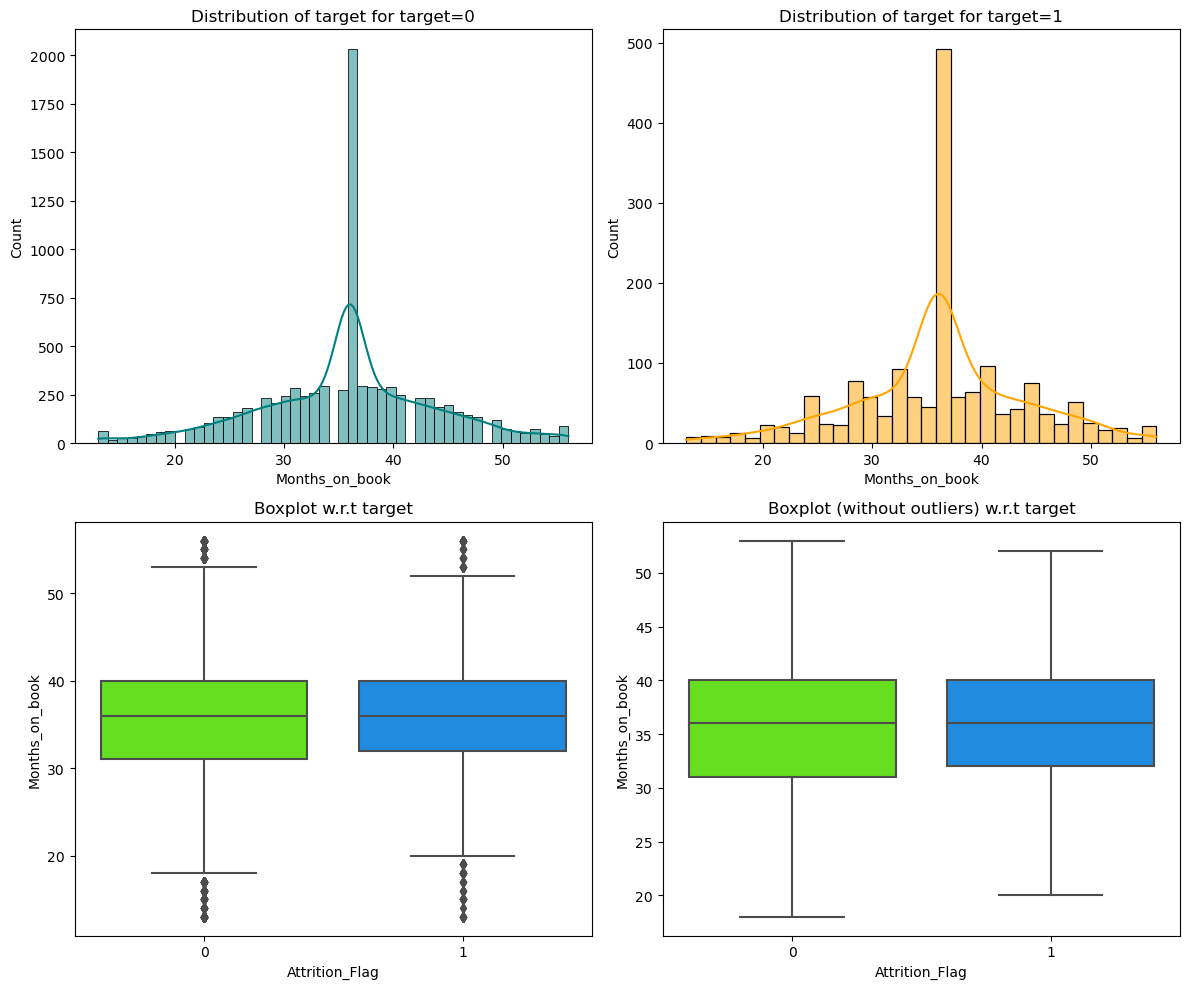

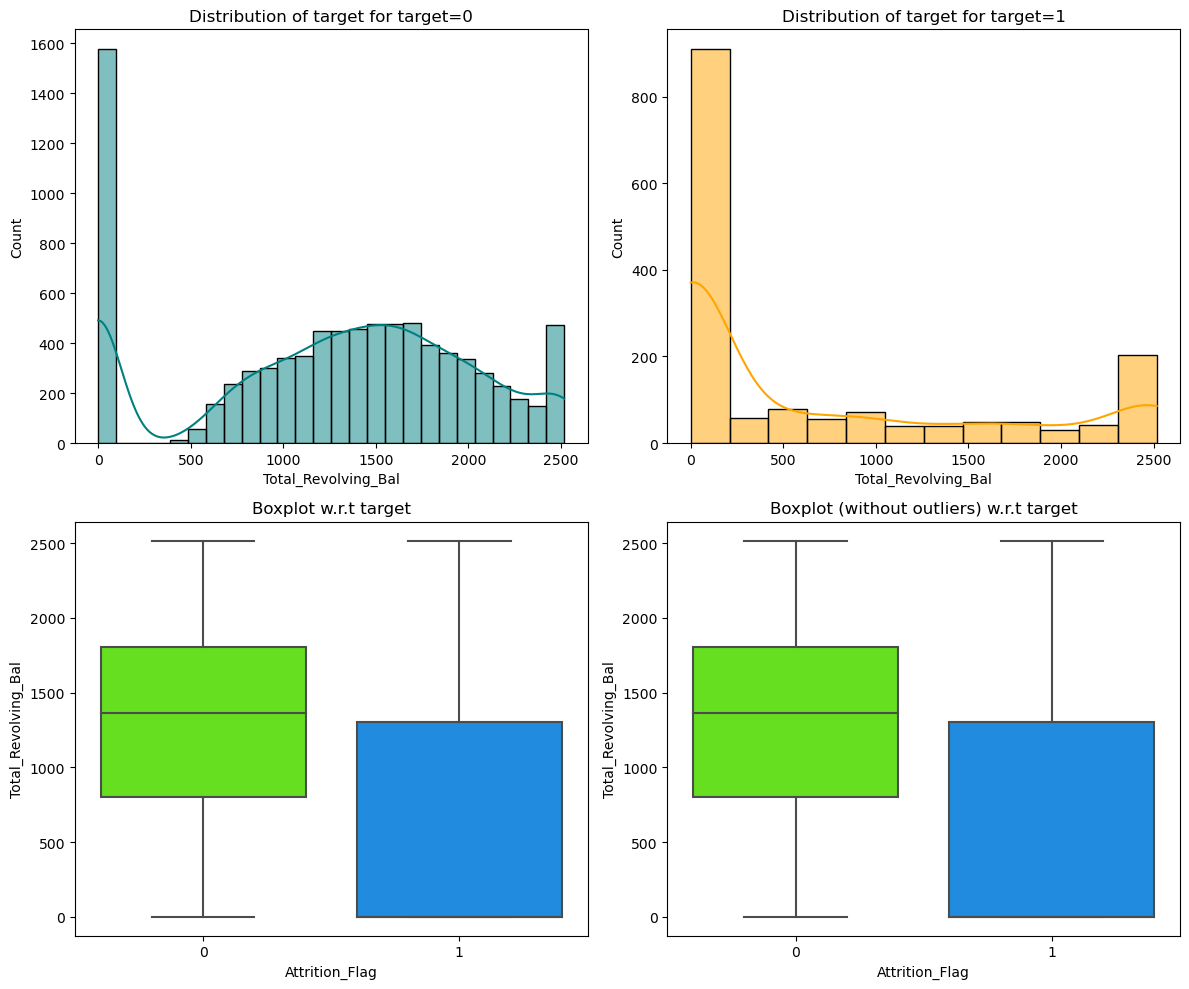

In [24]:
columns_for_DistBarplot_2 = ['Months_on_book',
                             'Total_Revolving_Bal'
                          ]

for i in columns_for_DistBarplot_2:
    distribution_plot_wrt_target(creditcard_df, i, "Attrition_Flag")

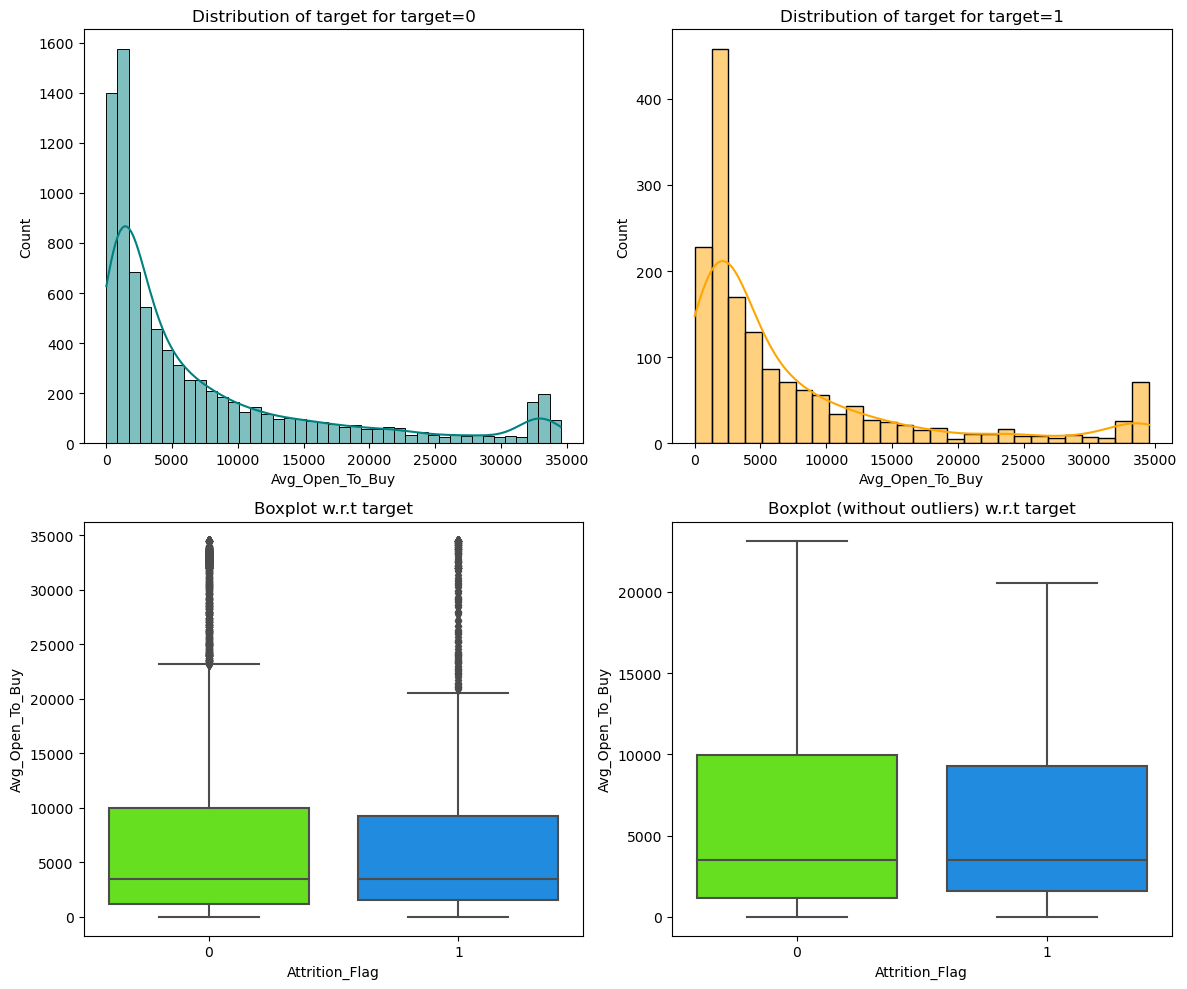

In [25]:
columns_for_DistBarplot_3 = ['Avg_Open_To_Buy'
                          ]

for i in columns_for_DistBarplot_3:
    distribution_plot_wrt_target(creditcard_df, i, "Attrition_Flag")

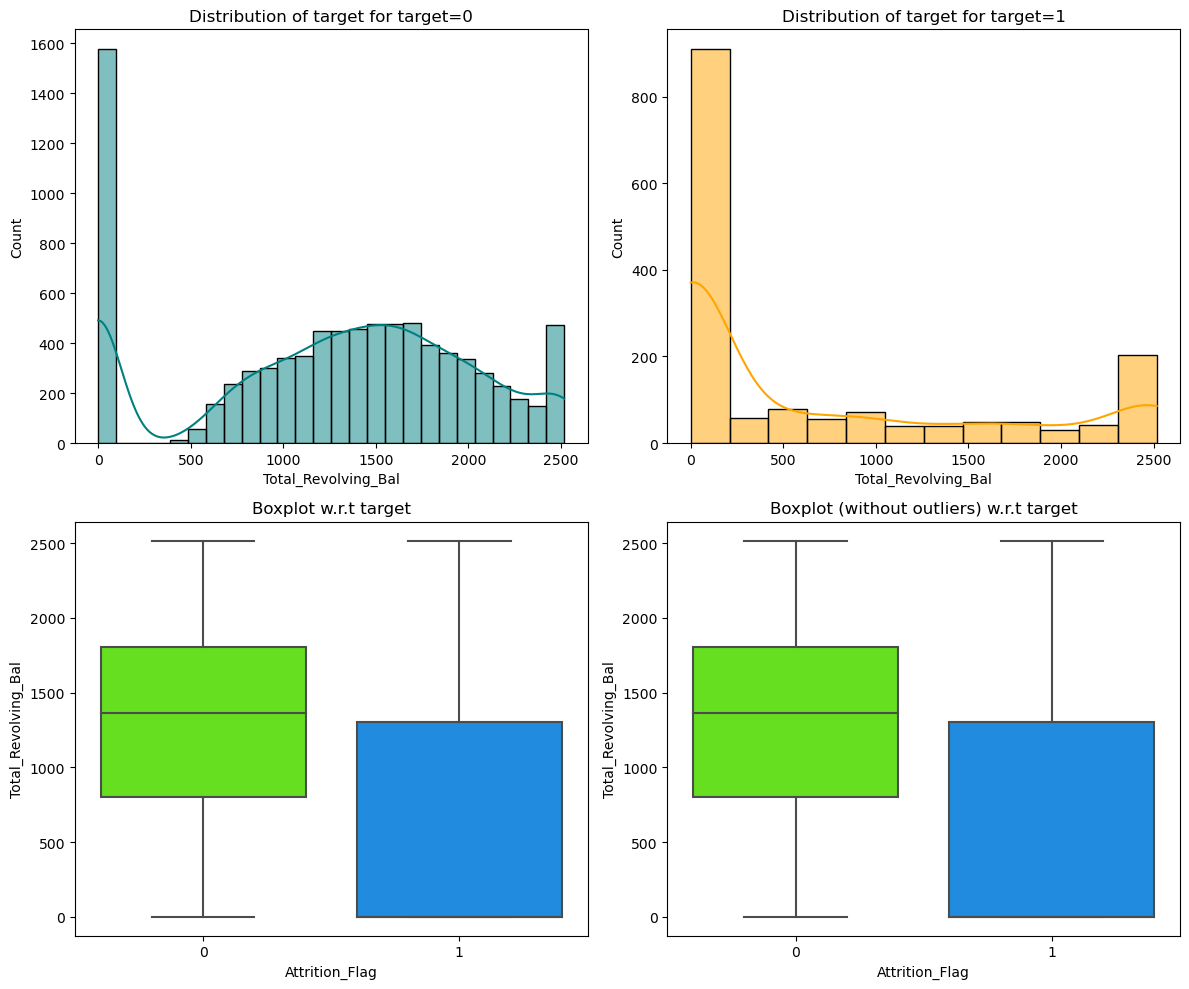

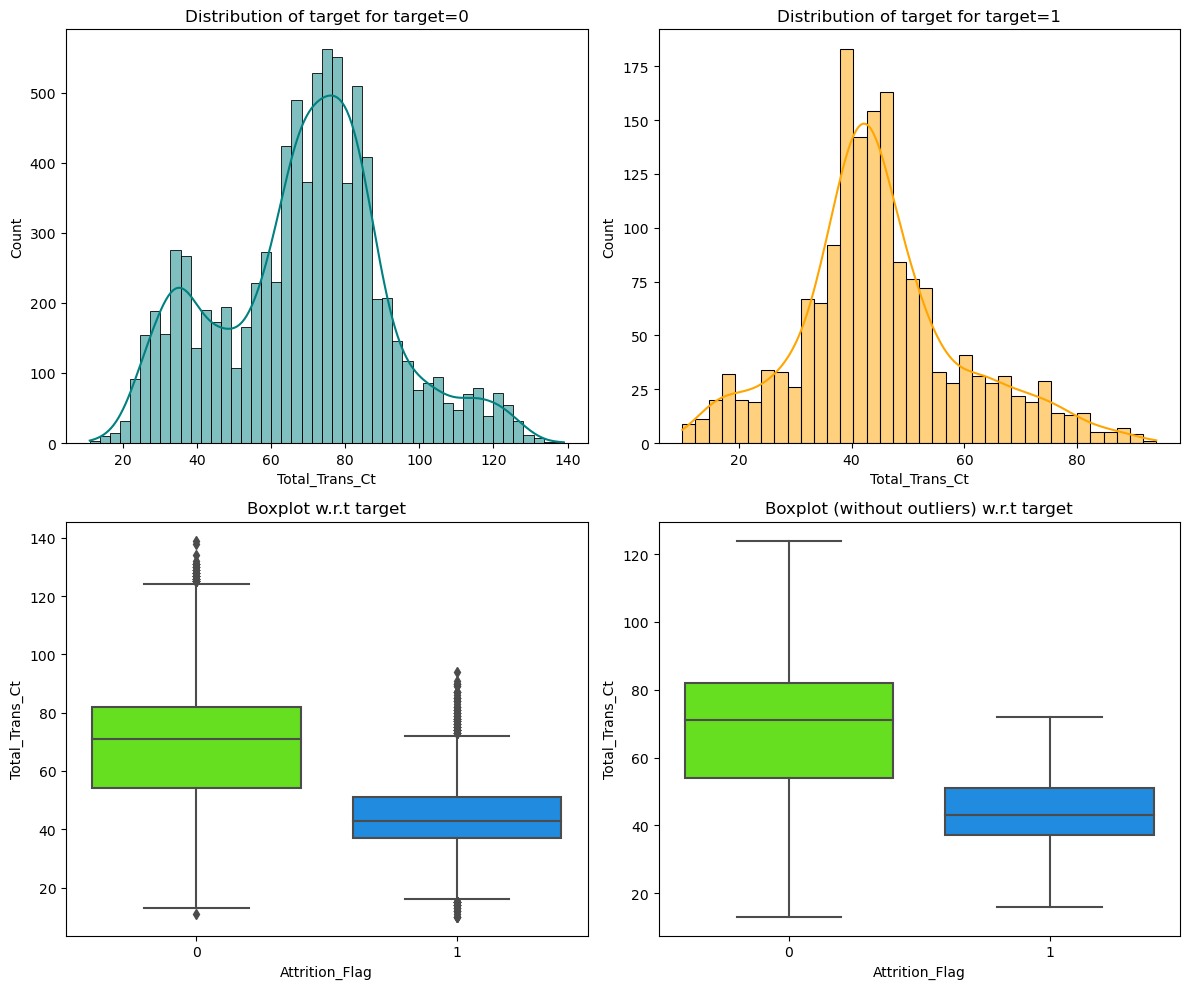

In [26]:
columns_for_DistBarplot_4 = ['Total_Revolving_Bal',
                              'Total_Trans_Ct'       
                             ]

for i in columns_for_DistBarplot_4:
    distribution_plot_wrt_target(creditcard_df, i, "Attrition_Flag")

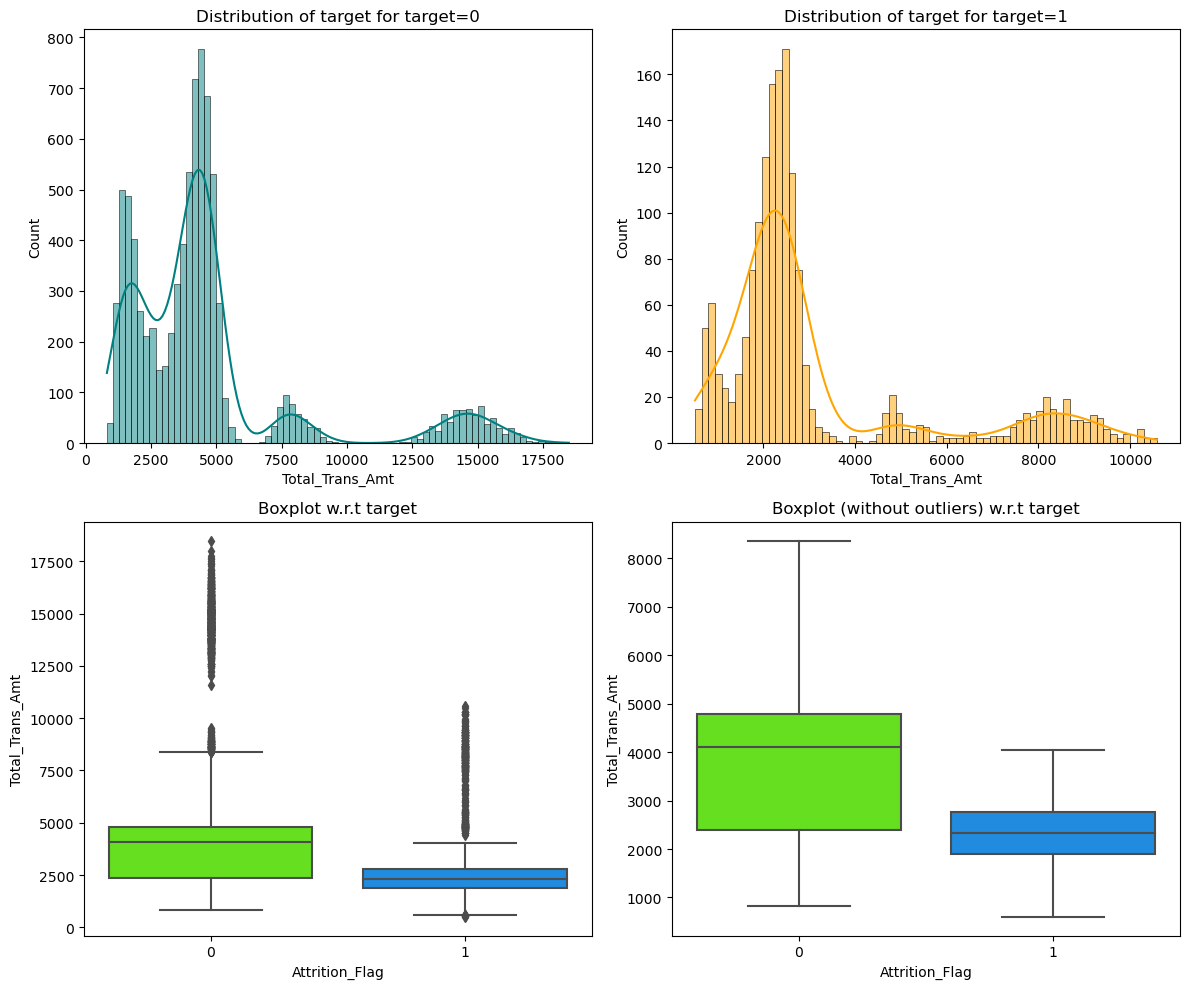

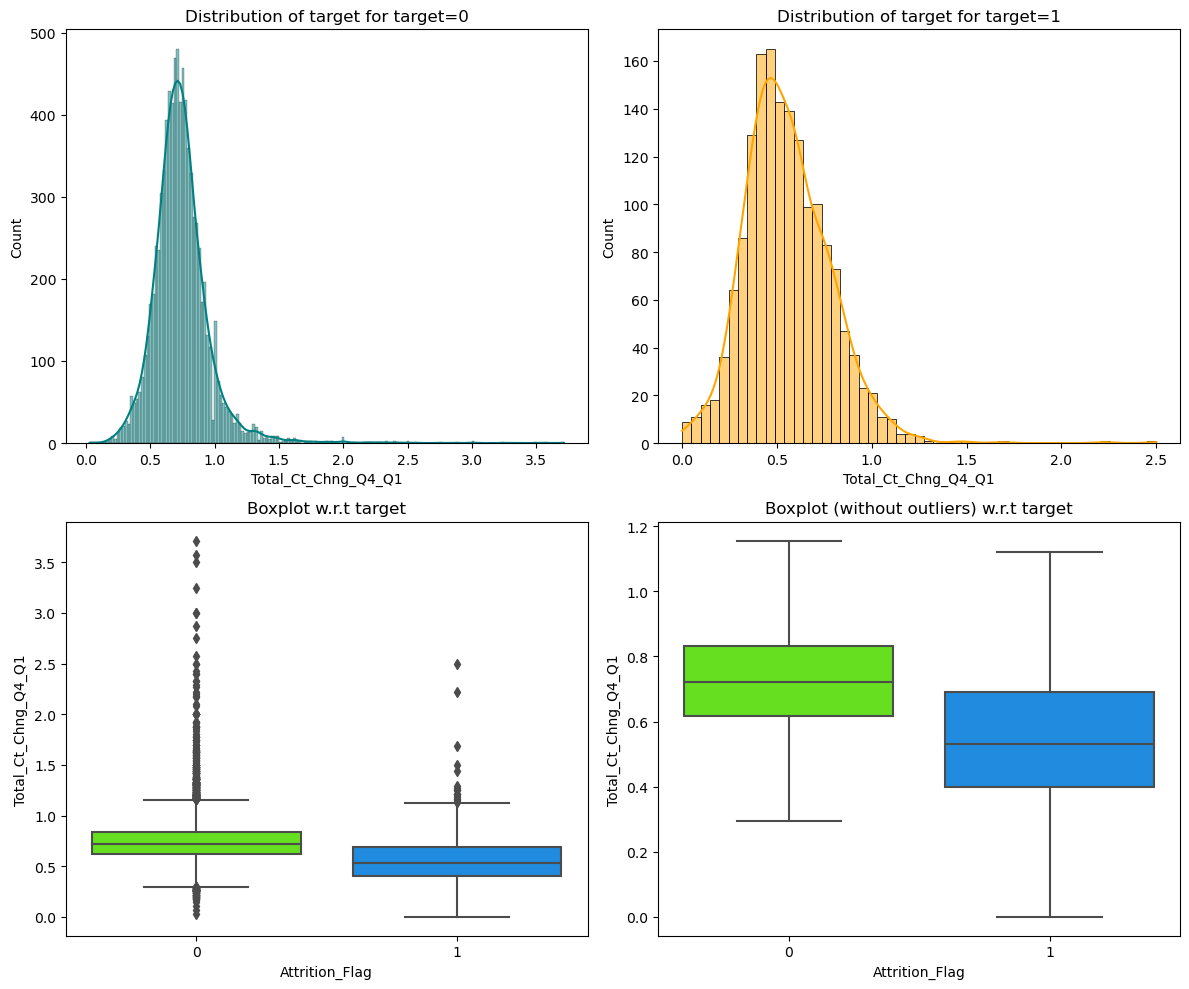

In [27]:
columns_for_DistBarplot_5 = ['Total_Trans_Amt',
                              'Total_Ct_Chng_Q4_Q1'
                             ]

for i in columns_for_DistBarplot_5:
    distribution_plot_wrt_target(creditcard_df, i, "Attrition_Flag")

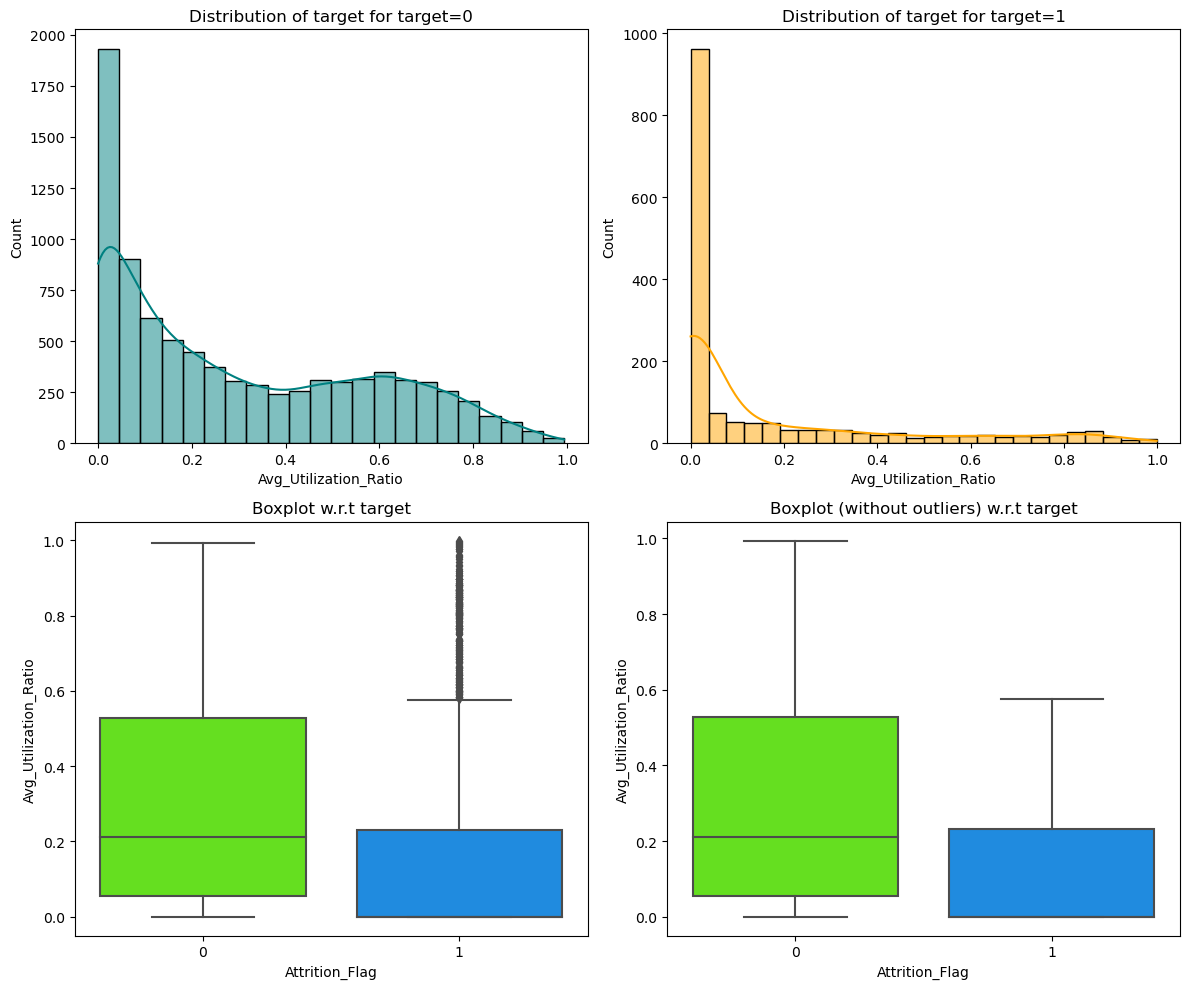

In [28]:
columns_for_DistBarplot_6 = ['Avg_Utilization_Ratio']

for i in columns_for_DistBarplot_6:
    distribution_plot_wrt_target(creditcard_df, i, "Attrition_Flag")

#### Correlation of features with target variable

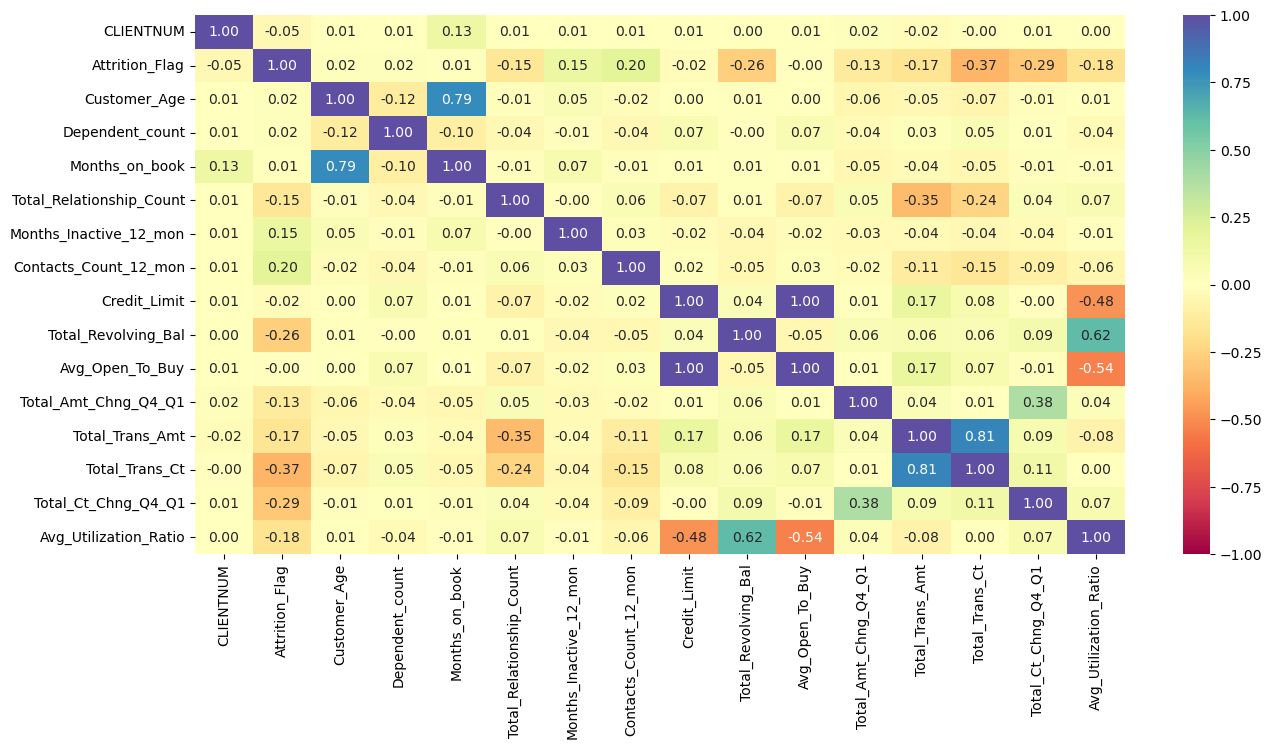

In [29]:
#heatmap 
plt.figure(figsize=(15, 7))
sns.heatmap(creditcard_df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Pre-processing

In [30]:
#make a copy of dataframe
df = creditcard_df.copy()

In [31]:
#drop CLIENTNUM
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

#### Outlier Detection

In [33]:
Q1 = df.quantile(0.25, numeric_only=True)  
Q3 = df.quantile(0.75, numeric_only=True)  

IQR = Q3 - Q1  

#Finding lower and upper bounds for all values
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [34]:
#checking the % of outliers
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Attrition_Flag              16.065962
Customer_Age                 0.019749
Dependent_count              0.000000
Months_on_book               3.811593
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       3.268490
Contacts_Count_12_mon        6.211119
Credit_Limit                 9.716599
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              9.509233
Total_Amt_Chng_Q4_Q1         3.910339
Total_Trans_Amt              8.847635
Total_Trans_Ct               0.019749
Total_Ct_Chng_Q4_Q1          3.890590
Avg_Utilization_Ratio        0.000000
dtype: float64

#### Train-Test Split

In [35]:
#replace abc with NaN in Income_Category
df["Income_Category"].replace("abc", np.nan, inplace=True) 

In [36]:
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [37]:
features = df.drop(['Attrition_Flag'], axis=1)
target = df['Attrition_Flag']

In [38]:
# train-test-val split

features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.2, random_state=1, stratify=target) ## Complete the code to split the data into train test in the ratio 80:20

features_test, features_val, target_test, target_val = train_test_split(
    features_temp, target_temp, test_size=0.25, random_state=1, stratify=target_temp) ## Complete the code to split the data into train test in the ratio 75:25

print(features_train.shape, features_val.shape, features_test.shape)

(8101, 19) (507, 19) (1519, 19)


#### Missing value imputation




In [39]:
#creating an instace of imputer 
imputer = SimpleImputer(strategy="most_frequent")

In [40]:
#cols to be imputed
cols_to_be_imputed = ["Education_Level", "Marital_Status", "Income_Category"]

In [41]:
#Fit and transform train data
features_train[cols_to_be_imputed] = imputer.fit_transform(features_train[cols_to_be_imputed])

#Transform val data
features_val[cols_to_be_imputed]  = imputer.transform(features_val[cols_to_be_imputed])

#Transform test data
features_test[cols_to_be_imputed] = imputer.transform(features_test[cols_to_be_imputed])

In [42]:
# Checking for missing values in train-test-val sets
print(features_train.isna().sum())
print("-" * 30)
print(features_val.isna().sum())
print("-" * 30)
print(features_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [43]:
cols = features_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(features_train[i].value_counts())
    print("*" * 30)

Gender
F    4288
M    3813
Name: count, dtype: int64
******************************
Education_Level
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: count, dtype: int64
******************************
Marital_Status
Married     4376
Single      3139
Divorced     586
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: count, dtype: int64
******************************
Card_Category
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: count, dtype: int64
******************************


In [44]:
cols = features_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(features_val[i].value_counts())
    print("*" * 30)

Gender
F    260
M    247
Name: count, dtype: int64
******************************
Education_Level
Graduate         246
High School       85
Uneducated        73
College           56
Post-Graduate     27
Doctorate         20
Name: count, dtype: int64
******************************
Marital_Status
Married     292
Single      185
Divorced     30
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    228
$40K - $60K       100
$60K - $80K        75
$80K - $120K       75
$120K +            29
Name: count, dtype: int64
******************************
Card_Category
Blue        468
Silver       30
Gold          8
Platinum      1
Name: count, dtype: int64
******************************


In [45]:
cols = features_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(features_test[i].value_counts())
    print("*" * 30)

Gender
F    810
M    709
Name: count, dtype: int64
******************************
Education_Level
Graduate         702
High School      296
Uneducated       227
College          140
Doctorate         78
Post-Graduate     76
Name: count, dtype: int64
******************************
Marital_Status
Married     768
Single      619
Divorced    132
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    705
$40K - $60K       270
$60K - $80K       217
$80K - $120K      214
$120K +           113
Name: count, dtype: int64
******************************
Card_Category
Blue        1408
Silver        89
Gold          18
Platinum       4
Name: count, dtype: int64
******************************


#### Data Transformation

In [46]:
#encoding categorical variables
features_train = pd.get_dummies(features_train, drop_first=True)
features_val = pd.get_dummies(features_val, drop_first=True)  
features_test = pd.get_dummies(features_test, drop_first=True)
print(features_train.shape, features_val.shape, features_test.shape)

(8101, 29) (507, 29) (1519, 29)


## Model Building

### Model evaluation criterion

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [47]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [48]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Model Building with original data

Sample code for model building with original data

In [49]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Trees", DecisionTreeClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(features_train, target_train)
    scores = recall_score(target_train, model.predict(features_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(features_train, target_train)
    scores_val = recall_score(target_val, model.predict(features_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9838709677419355
Random forest: 1.0
Decision Trees: 1.0
GradientBoost: 0.8840245775729647
AdaBoost: 0.84715821812596

Validation Performance:

Bagging: 0.8148148148148148
Random forest: 0.7530864197530864
Decision Trees: 0.8271604938271605
GradientBoost: 0.9012345679012346
AdaBoost: 0.8641975308641975


#### Model Building with Oversampled data


In [50]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(target_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(target_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(features_train, target_train)

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 



In [51]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Trees", DecisionTreeClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(target_val, model.predict(features_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9983821150169142
Random forest: 1.0
Decision Trees: 1.0
GradientBoost: 0.9769083688777761
AdaBoost: 0.9654360935431681

Validation Performance:

Bagging: 0.8765432098765432
Random forest: 0.9012345679012346
Decision Trees: 0.8765432098765432
GradientBoost: 0.9382716049382716
AdaBoost: 0.8641975308641975


#### Model Building with Undersampled data

In [52]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(features_train, target_train)

In [53]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(target_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(target_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [54]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Trees", DecisionTreeClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(target_val, model.predict(features_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9946236559139785
Random forest: 1.0
Decision Trees: 1.0
GradientBoost: 0.9823348694316436
AdaBoost: 0.9516129032258065

Validation Performance:

Bagging: 0.9382716049382716
Random forest: 0.9506172839506173
Decision Trees: 0.9135802469135802
GradientBoost: 0.9382716049382716
AdaBoost: 0.9506172839506173


### HyperparameterTuning

#### Tuning Bagging Classifier using original data

In [55]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(features_train,target_train) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8448246389625702:


In [56]:
# Creating new pipeline with best parameters
tuned_BC = BaggingClassifier( 
    random_state=1,
    n_estimators= 70, 
    max_samples= 0.9, 
    max_features= 0.9
) 

tuned_BC.fit(features_train,target_train) 

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [57]:
BC_train = model_performance_classification_sklearn(tuned_BC, features_train, target_train) 
BC_train

,Accuracy,Recall,Precision,F1
0,0.999877,0.999232,1.0,0.999616


In [58]:
BC_val = model_performance_classification_sklearn(tuned_BC, features_val, target_val) 

#### Tuning Bagging Classifier using oversampled data

In [59]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:


In [60]:
# Creating new pipeline with best parameters
tuned_BC2 = BaggingClassifier( 
    random_state=1,
    n_estimators= 50, 
    max_samples= 1, 
    max_features= 0.7
) 

tuned_BC2.fit(X_train_over, y_train_over) 

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

In [61]:
BC_train2 = model_performance_classification_sklearn(tuned_BC2, X_train_over, y_train_over) 
BC_train2

,Accuracy,Recall,Precision,F1
0,0.5,1.0,0.5,0.666667


In [62]:
BC_val2 = model_performance_classification_sklearn(tuned_BC2, features_val, target_val) 
BC_val2

,Accuracy,Recall,Precision,F1
0,0.159763,1.0,0.159763,0.27551


#### Tuning Bagging Classifier using undersampled data

In [63]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:


In [64]:
# Creating new pipeline with best parameters
tuned_BC3 = BaggingClassifier( 
    random_state=1,
    n_estimators= 30, 
    max_samples= 1, 
    max_features= 0.7
) 

tuned_BC3.fit(X_train_un, y_train_un) 

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

In [65]:
BC_train3 = model_performance_classification_sklearn(tuned_BC3, X_train_un, y_train_un) 
BC_train3

,Accuracy,Recall,Precision,F1
0,0.5,0.0,0.0,0.0


In [66]:
BC_val3 = model_performance_classification_sklearn(tuned_BC3, features_val, target_val) 
BC_val3

,Accuracy,Recall,Precision,F1
0,0.840237,0.0,0.0,0.0


#### Tuning RandomForestClassifier using original data

In [67]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(features_train,target_train) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7749513704686117:


In [68]:
# Creating new pipeline with best parameters
tuned_RFC = RandomForestClassifier(
    n_estimators = 110, 
    min_samples_leaf = 1, 
    max_samples = 0.6, 
    max_features = 'sqrt'
) 

tuned_RFC.fit(features_train,target_train) 

RandomForestClassifier(max_samples=0.6, n_estimators=110)

In [69]:
RFC_train = model_performance_classification_sklearn(tuned_RFC, features_train, target_train) 
RFC_train

,Accuracy,Recall,Precision,F1
0,0.996791,0.982335,0.99766,0.989938


In [70]:
RFC_val = model_performance_classification_sklearn(tuned_RFC, features_val, target_val) 
RFC_val

,Accuracy,Recall,Precision,F1
0,0.952663,0.765432,0.925373,0.837838


#### Tuning RandomForestClassifier using oversampled data

In [71]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9761758213219063:


In [72]:
# Creating new pipeline with best parameters
tuned_RFC2 = RandomForestClassifier(
    n_estimators = 110, 
    min_samples_leaf = 1, 
    max_samples = 0.6, 
    max_features = 'sqrt'
) 

tuned_RFC2.fit(X_train_over, y_train_over) 

RandomForestClassifier(max_samples=0.6, n_estimators=110)

In [73]:
RFC_train2 = model_performance_classification_sklearn(tuned_RFC2, X_train_over, y_train_over) 
RFC_train2

,Accuracy,Recall,Precision,F1
0,0.999191,1.0,0.998385,0.999192


In [74]:
RFC_val2 = model_performance_classification_sklearn(tuned_RFC2, features_val, target_val) 
RFC_val2

,Accuracy,Recall,Precision,F1
0,0.964497,0.901235,0.879518,0.890244


#### Tuning RandomForestClassifier using undersampled data

In [75]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9447008547008547:


In [76]:
# Creating new pipeline with best parameters
tuned_RFC3 = RandomForestClassifier(
    n_estimators = 110, 
    min_samples_leaf = 1, 
    max_samples = 0.6, 
    max_features = 'sqrt'
) 

tuned_RFC3.fit(X_train_un, y_train_un) 

RandomForestClassifier(max_samples=0.6, n_estimators=110)

In [77]:
RFC_train3 = model_performance_classification_sklearn(tuned_RFC3, X_train_un, y_train_un) 
RFC_train3

,Accuracy,Recall,Precision,F1
0,0.998464,1.0,0.996937,0.998466


In [78]:
RFC_val3 = model_performance_classification_sklearn(tuned_RFC3, features_val, target_val) 
RFC_val3

,Accuracy,Recall,Precision,F1
0,0.936884,0.962963,0.728972,0.829787


#### Sample tuning method for Decision tree with original data

In [79]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(features_train,target_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7588211022693782:


In [80]:
# Creating new pipeline with best parameters
tuned_DTC = DecisionTreeClassifier(
    min_samples_leaf = 7, 
    min_impurity_decrease = 0.0001, 
    max_leaf_nodes = 15, 
    max_depth = 5
) 

tuned_DTC.fit(features_train,target_train) 

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [81]:
DTC_train = model_performance_classification_sklearn(tuned_DTC, features_train, target_train) 
DTC_train

,Accuracy,Recall,Precision,F1
0,0.934576,0.781106,0.805864,0.793292


In [82]:
DTC_val = model_performance_classification_sklearn(tuned_DTC, features_val, target_val) 
DTC_val

,Accuracy,Recall,Precision,F1
0,0.925049,0.802469,0.747126,0.77381


#### Sample tuning method for Decision tree with oversampled data

In [83]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9139576029087131:


In [84]:
# Creating new pipeline with best parameters
tuned_DTC2 = DecisionTreeClassifier(
    min_samples_leaf = 1, 
    min_impurity_decrease = 0.001, 
    max_leaf_nodes = 15, 
    max_depth = 4
) 

tuned_DTC2.fit(X_train_over,y_train_over) 

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [85]:
DTC_train2 = model_performance_classification_sklearn(tuned_DTC2, X_train_over,y_train_over) 
DTC_train2

,Accuracy,Recall,Precision,F1
0,0.918885,0.916752,0.920679,0.918712


In [86]:
DTC_val2 = model_performance_classification_sklearn(tuned_DTC2, features_val, target_val) 
DTC_val2

,Accuracy,Recall,Precision,F1
0,0.90927,0.925926,0.652174,0.765306


#### Sample tuning method for Decision tree with undersampled data

In [87]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.9139699381078692:


In [88]:
# Creating new pipeline with best parameters
tuned_DTC3 = DecisionTreeClassifier(
    min_samples_leaf = 7, 
    min_impurity_decrease = 0.0001, 
    max_leaf_nodes = 10, 
    max_depth = 5
) 

tuned_DTC3.fit(X_train_un,y_train_un) 

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [89]:
DTC_train3 = model_performance_classification_sklearn(tuned_DTC3, X_train_un, y_train_un) 
DTC_train3

,Accuracy,Recall,Precision,F1
0,0.908986,0.888633,0.926341,0.907095


In [90]:
DTC_val3 = model_performance_classification_sklearn(tuned_DTC3, features_val, target_val) 
DTC_val3

,Accuracy,Recall,Precision,F1
0,0.905325,0.864198,0.654206,0.744681


#### Sample tuning method for AdaBoostClassifier with original data

In [91]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(features_train,target_train) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8494429708222813:


In [92]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators= 100, 
    learning_rate= 0.1, 
    estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) 

tuned_adb.fit(features_train,target_train) 

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [93]:
adb_train = model_performance_classification_sklearn(tuned_adb,features_train,target_train) 
adb_train

,Accuracy,Recall,Precision,F1
0,0.981484,0.921659,0.961538,0.941176


In [94]:
adb_val =  model_performance_classification_sklearn(tuned_adb,features_val, target_val) 

adb_val

,Accuracy,Recall,Precision,F1
0,0.980276,0.901235,0.973333,0.935897


#### Sample tuning method for AdaBoostClassifier with oversampled data

In [95]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9542617841838723:


In [96]:
# Creating new pipeline with best parameters
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators= 75, 
    learning_rate= 0.05, 
    estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) 

tuned_adb2.fit(X_train_over,y_train_over) 

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=75, random_state=1)

In [97]:
adb_train2 = model_performance_classification_sklearn(tuned_adb2,X_train_over,y_train_over) 
adb_train2

,Accuracy,Recall,Precision,F1
0,0.965289,0.97029,0.960682,0.965462


In [98]:
adb_val2 =  model_performance_classification_sklearn(tuned_adb2,features_val, target_val) 

adb_val2

,Accuracy,Recall,Precision,F1
0,0.952663,0.925926,0.806452,0.862069


#### Sample tuning method for AdaBoostClassifier with undersampled data

In [99]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9516062481579723:


In [100]:
# Creating new pipeline with best parameters
tuned_adb3 = AdaBoostClassifier(
    random_state=1,
    n_estimators= 75, 
    learning_rate= 0.1, 
    estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) 

tuned_adb3.fit(X_train_un,y_train_un) 

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [101]:
adb_train3 = model_performance_classification_sklearn(tuned_adb3,X_train_un,y_train_un) 
adb_train3

,Accuracy,Recall,Precision,F1
0,0.981183,0.986175,0.976426,0.981276


In [102]:
adb_val3 =  model_performance_classification_sklearn(tuned_adb3,features_val, target_val) 

adb_val3

,Accuracy,Recall,Precision,F1
0,0.95069,0.962963,0.78,0.861878


## Model Comparison and Final Model Selection

In [103]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        BC_train.T,
        BC_train2.T,
        BC_train3.T,
        
        RFC_train.T,
        RFC_train2.T,
        RFC_train3.T,
        
        DTC_train.T,
        DTC_train2.T,
        DTC_train3.T,
        
        adb_train.T,
        adb_train2.T,
        adb_train3.T        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier trained with Original data",
    "Bagging Classifier trained with Oversampled data",
    "Bagging Classifier trained with Undersampled data",
    
    "Random Forest Classifier trained with Original data",
    "Random Forest Classifier trained with Oversampled data",
    "Random Forest Classifier trained with Undersampled data",
    
    "Decision Tree Classifier trained with Original data",
    "Decision Tree Classifier trained with Oversampled data",
    "Decision Tree Classifier trained with Undersampled data",
    
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
    "AdaBoost trained with Undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier trained with Original data,Bagging Classifier trained with Oversampled data,Bagging Classifier trained with Undersampled data,Random Forest Classifier trained with Original data,Random Forest Classifier trained with Oversampled data,Random Forest Classifier trained with Undersampled data,Decision Tree Classifier trained with Original data,Decision Tree Classifier trained with Oversampled data,Decision Tree Classifier trained with Undersampled data,AdaBoost trained with Original data,AdaBoost trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.999877,0.500000,0.5,0.996791,0.999191,0.998464,0.934576,0.918885,0.908986,0.981484,0.965289,0.981183
Recall,0.999232,1.000000,0.0,0.982335,1.000000,1.000000,0.781106,0.916752,0.888633,0.921659,0.970290,0.986175
Precision,1.000000,0.500000,0.0,0.997660,0.998385,0.996937,0.805864,0.920679,0.926341,0.961538,0.960682,0.976426
F1,0.999616,0.666667,0.0,0.989938,0.999192,0.998466,0.793292,0.918712,0.907095,0.941176,0.965462,0.981276


In [104]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        BC_val.T,
        BC_val2.T,
        BC_val3.T,
        
        RFC_val.T,
        RFC_val2.T,
        RFC_val3.T,
        
        DTC_val.T,
        DTC_val2.T,
        DTC_val3.T,
        
        adb_val.T,
        adb_val2.T,
        adb_val3.T        
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Bagging Classifier trained with Original data",
    "Bagging Classifier trained with Oversampled data",
    "Bagging Classifier trained with Undersampled data",
    
    "Random Forest Classifier trained with Original data",
    "Random Forest Classifier trained with Oversampled data",
    "Random Forest Classifier trained with Undersampled data",
    
    "Decision Tree Classifier trained with Original data",
    "Decision Tree Classifier trained with Oversampled data",
    "Decision Tree Classifier trained with Undersampled data",
    
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
    "AdaBoost trained with Undersampled data"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Bagging Classifier trained with Original data,Bagging Classifier trained with Oversampled data,Bagging Classifier trained with Undersampled data,Random Forest Classifier trained with Original data,Random Forest Classifier trained with Oversampled data,Random Forest Classifier trained with Undersampled data,Decision Tree Classifier trained with Original data,Decision Tree Classifier trained with Oversampled data,Decision Tree Classifier trained with Undersampled data,AdaBoost trained with Original data,AdaBoost trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.958580,0.159763,0.840237,0.952663,0.964497,0.936884,0.925049,0.909270,0.905325,0.980276,0.952663,0.950690
Recall,0.851852,1.000000,0.000000,0.765432,0.901235,0.962963,0.802469,0.925926,0.864198,0.901235,0.925926,0.962963
Precision,0.884615,0.159763,0.000000,0.925373,0.879518,0.728972,0.747126,0.652174,0.654206,0.973333,0.806452,0.780000
F1,0.867925,0.275510,0.000000,0.837838,0.890244,0.829787,0.773810,0.765306,0.744681,0.935897,0.862069,0.861878


In [105]:
models_train_comp_df - models_val_comp_df

,Bagging Classifier trained with Original data,Bagging Classifier trained with Oversampled data,Bagging Classifier trained with Undersampled data,Random Forest Classifier trained with Original data,Random Forest Classifier trained with Oversampled data,Random Forest Classifier trained with Undersampled data,Decision Tree Classifier trained with Original data,Decision Tree Classifier trained with Oversampled data,Decision Tree Classifier trained with Undersampled data,AdaBoost trained with Original data,AdaBoost trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.041297,0.340237,-0.340237,0.044128,0.034694,0.061580,0.009527,0.009615,0.003661,0.001208,0.012626,0.030492
Recall,0.147380,0.000000,0.000000,0.216903,0.098765,0.037037,-0.021363,-0.009173,0.024435,0.020424,0.044364,0.023212
Precision,0.115385,0.340237,0.000000,0.072287,0.118867,0.267965,0.058737,0.268506,0.272135,-0.011795,0.154230,0.196426
F1,0.131691,0.391156,0.000000,0.152100,0.108948,0.168679,0.019482,0.153406,0.162414,0.005279,0.103393,0.119398


- AdaBoost Classifier trained with Original data is the best model for our data as it has very high metric values and gives the best generalized performance as compared to other models.

#### Test set final performance

In [106]:
# Let's check the performance on test set
adb_test = model_performance_classification_sklearn(tuned_adb, features_test, target_test) 
adb_test

,Accuracy,Recall,Precision,F1
0,0.975642,0.922131,0.925926,0.924025


#### Feature Importances

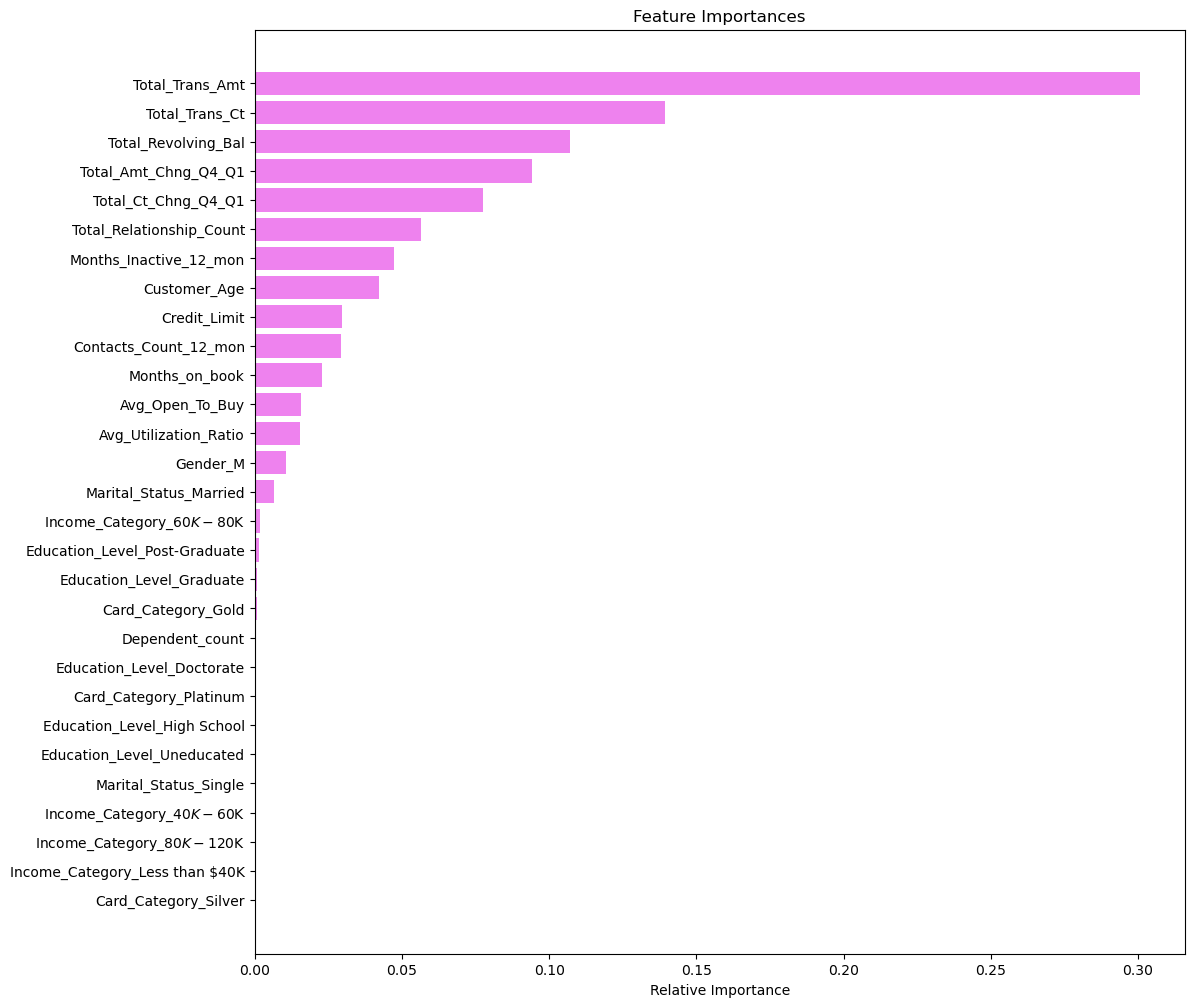

In [107]:
#visualizing features' importance in AdaBoost Classifier trained with Original data
feature_names = features_train.columns
importances = tuned_adb.feature_importances_ 
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

Based on this project, below are insights and actionable business recommendations for Thera Bank’s credit card attrition problem:

Insights

- A significant portion of attrited customers falls within lower income brackets and less education, such as high school or uneducated groups. These segments may be more sensitive to fees or credit limitations, influencing their decision to leave.

- Higher attrition rates are seen among certain card types, particularly lower-tier cards.

- Lower transaction counts and amounts are associated with higher attrition. This suggests that inactive or low-usage customers are more likely to leave, potentially because they do not see value in retaining the card.

- Customers with fewer total relationships with the bank (e.g., only a single product like a credit card) also exhibit higher attrition rates. This indicates that loyalty and engagement may be lower for customers who only use a single service.

- The best-performing model in terms of generalization to unseen data was the AdaBoost classifier with the original data, showing high recall and precision. This indicates the model’s effectiveness at identifying at-risk customers.

- Features with high importance included transaction count and amount, average utilization ratio, and months of inactivity, suggesting these are strong indicators of attrition.

Actionable Business Recommendations

1. Targeted Retention Campaigns: 
    - For lower-income groups, consider promotional strategies that mitigate costs, such as fee reductions or introductory offers that highlight the value of card ownership. This may improve retention for cost-sensitive customers. 
   - Engagement Programs for Low Activity Users: Implement incentive programs (e.g., rewards for frequent usage, spending-based bonuses) for customers with lower transaction counts or inactive months to increase engagement and reduce attrition.
2. Cross-Selling to Increase Relationship Depth:
   - Promote additional banking products (e.g., savings accounts, loans) to single-product customers. By increasing the number of relationships, customer loyalty may improve, and attrition may decrease. Tailor these offers to align with customer needs based on their profile and usage data.
3. Enhanced Customer Education on Card Benefits:
   - Develop educational resources highlighting card benefits and rewards, especially targeting less-educated groups. Use email campaigns or app notifications to explain how card usage can maximize benefits and improve financial outcomes, possibly leading to increased retention.

***